In [1]:
import os
HOME = os.getcwd()
import torch
# %cd {HOME}
# !git clone https://github.com/IDEA-Research/GroundingDINO.git
# %cd {HOME}/GroundingDINO
# !pip install datumaro
# !pip install -r requirements.txt
# !pip install -q -e .

In [2]:
CONFIG_PATH = os.path.join(HOME, "GroundingDINO\\groundingdino\\config\\GroundingDINO_SwinT_OGC.py")
# print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

# %cd {HOME}
# !mkdir {HOME}\\weights
# %cd {HOME}\\weights

# # Usando Invoke-WebRequest do PowerShell no lugar do wget
# !powershell -Command "Invoke-WebRequest -Uri 'https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth' -OutFile 'groundingdino_swint_ogc.pth'"

In [3]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate
torch.backends.cuda.is_available = lambda: False
model = load_model(CONFIG_PATH, WEIGHTS_PATH, device='cpu').to(torch.device('cpu'))

c:\Users\Usuario\Documents\server-defell\weights\groundingdino_swint_ogc.pth ; exist: True
c:\Users\Usuario\Documents\server-defell\GroundingDINO


final text_encoder_type: bert-base-uncased


In [4]:
#!pip install datumaro==0.5.0
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

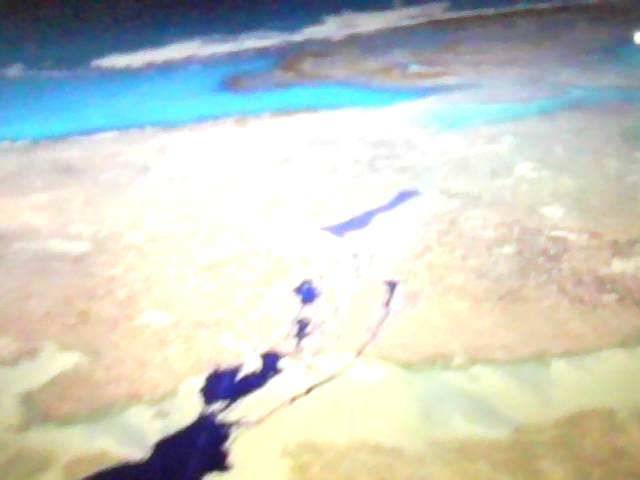

In [34]:
import os
import supervision as sv
import torch
import numpy as np
from datumaro import Bbox, Dataset, DatasetItem, Image
from PIL import Image as PILImage
from typing import Union
import requests
from io import BytesIO

# Abrir a imagem especificada
image_path = r'C:\Users\Usuario\Documents\server-defell\data\images\empresa_DOS0724\2025-06-12\c876076a75559956_RAW-DOS0724-APS005-oil_spill-20250612182047296-1.png'
image = PILImage.open(image_path)
image

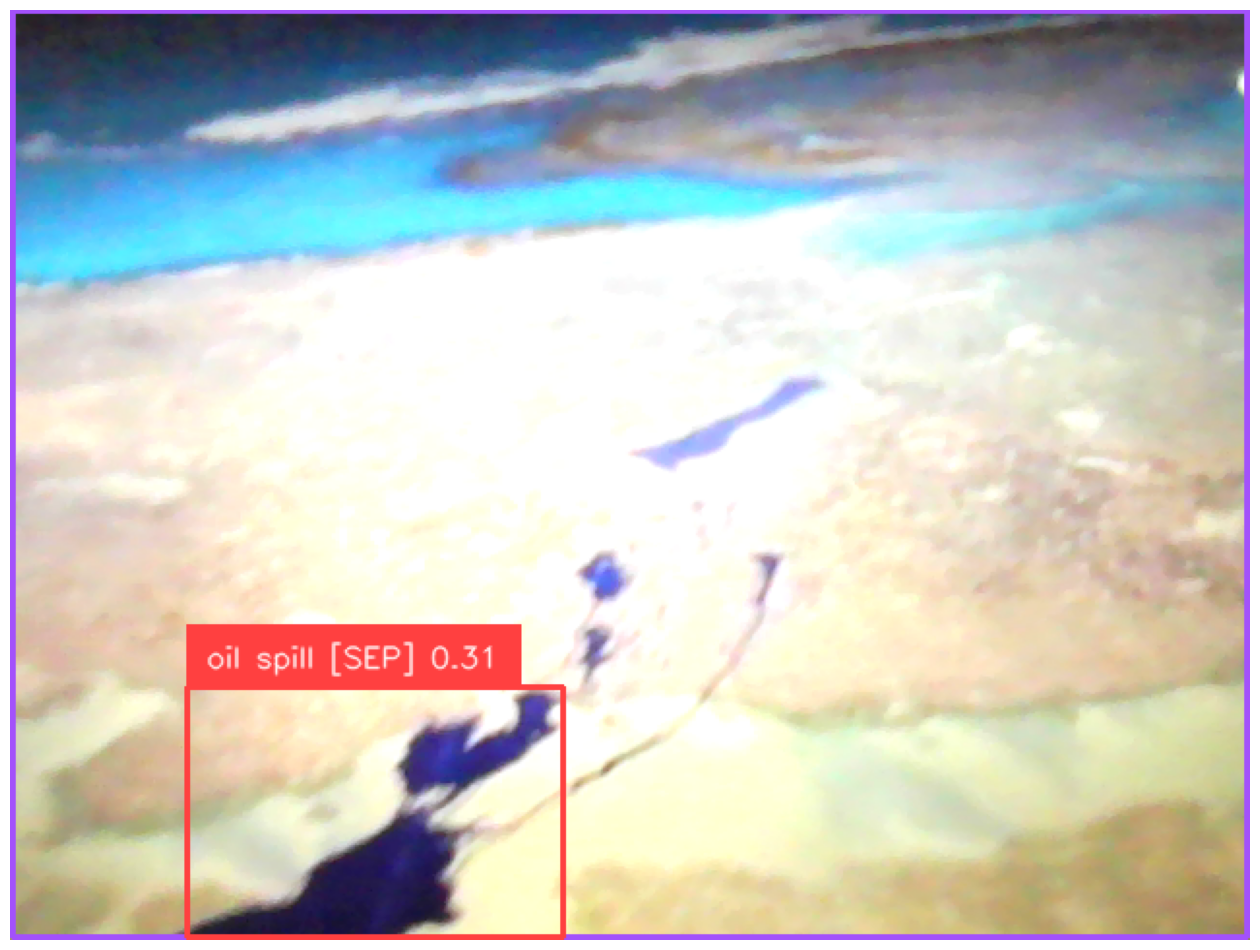

{'annotated_image': array([[[251,  81, 163],
         [251,  81, 163],
         [251,  81, 163],
         ...,
         [251,  81, 163],
         [251,  81, 163],
         [251,  81, 163]],
 
        [[251,  81, 163],
         [251,  81, 163],
         [251,  81, 163],
         ...,
         [251,  81, 163],
         [251,  81, 163],
         [251,  81, 163]],
 
        [[251,  81, 163],
         [251,  81, 163],
         [251,  81, 163],
         ...,
         [251,  81, 163],
         [251,  81, 163],
         [251,  81, 163]],
 
        ...,
 
        [[251,  81, 163],
         [251,  81, 163],
         [251,  81, 163],
         ...,
         [251,  81, 163],
         [251,  81, 163],
         [251,  81, 163]],
 
        [[251,  81, 163],
         [251,  81, 163],
         [251,  81, 163],
         ...,
         [251,  81, 163],
         [251,  81, 163],
         [251,  81, 163]],
 
        [[104, 144, 167],
         [251,  81, 163],
         [251,  81, 163],
         ...,
         

In [36]:
# Abrir a imagem especificada
image_path = r'C:\Users\Usuario\Documents\server-defell\data\images\empresa_DOS0724\2025-06-12\c876076a75559956_RAW-DOS0724-APS005-oil_spill-20250612182047296-1.png'
image = PILImage.open(image_path)

def process_image_detection(
    image_input: np.ndarray,
    model: object,
    text_prompt: str = "oil spill",
    box_threshold: float = 0.3,
    text_threshold: float = 0.0,
    lot: bool = True
):
    """Processa detecção de imagem e retorna dataset com anotações
    
    Args:
        image_input: Array numpy da imagem
        model: Modelo de detecção
        text_prompt: Prompt de texto para detecção
        box_threshold: Limiar de detecção de caixas
        text_threshold: Limiar de detecção de texto
        lot: Se retorna resultados completos ou apenas dataset e imagem anotada
    """
    
    image_source = image_input
    image_id = "processed_image"
    
    # Converter imagem para tensor
    image_tensor = torch.from_numpy(image_source).permute(2, 0, 1).float()
    
    # Processar detecção
    model.eval()
    with torch.no_grad():
        boxes, logits, phrases = predict(
            model=model,
            image=image_tensor,
            caption=text_prompt,
            box_threshold=box_threshold,
            text_threshold=text_threshold,
            device='cpu'
        )
    
    # Converter tensores para numpy
    boxes = boxes.cpu().numpy()
    logits = logits.cpu().numpy()
    
    # Anotar a imagem
    boxes_tensor = torch.from_numpy(boxes)
    logits_tensor = torch.from_numpy(logits)
    annotated_frame = annotate(image_source, boxes_tensor, logits_tensor, phrases)
    sv.plot_image(annotated_frame, (16, 16))
    
    h, w = image_source.shape[:2]
    
    # Criar dataset
    annotations = [Bbox(*(box * np.array([w, h, w, h])), label=1) for box in boxes]
    pil_image = PILImage.fromarray(image_source)
    dataset_image = Image(data=np.array(pil_image))
    
    dataset = Dataset.from_iterable([
        DatasetItem(
            id=image_id,
            media=dataset_image,
            annotations=annotations
        )
    ], categories=[text_prompt])
    
    return {
        #'dataset': dataset,
        'annotated_image': annotated_frame,
        'detection_data': {
            'boxes': boxes,
            'logits': logits,
            'phrases': phrases,
            'image_dimensions': (h, w)
        }
    } if lot else (dataset, annotated_frame)

# Exemplo de uso
result = process_image_detection(
    image_input=np.array(image),
    model=model,
    lot=True
)
result

In [ ]:
# Tentando instalar o pacote datumaro com pip mágico do Jupyter
%pip install datumaro --user

# Caso ainda falhe, tentamos instalar via conda (se disponível)
try:
    from datumaro import Bbox, Dataset, DatasetItem, Image
except ImportError:
    import sys
    !conda install -y -c conda-forge datumaro
    from datumaro import Bbox, Dataset, DatasetItem, Image

from PIL import Image as PILImage
from typing import Union


  Using cached datumaro-1.10.0.tar.gz (567 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached h5py-3.14.0-cp313-cp313-win_amd64.whl.metadata (2.7 kB)
  Using cached imagesize-1.4.1-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached lxml-5.4.0-cp313-cp313-win_amd64.whl.metadata (3.6 kB)
  Using cached nibabel-5.3.2-py3-none-any.whl.metadata (9.1 kB)
  Using cached numpy-1.26.4-cp313-cp313-win_amd64.whl
  Using cached orjson-3.10.7-cp313-none-win_amd64.whl.metadata (51 kB)
  Using cached ruamel.yaml-0.18.14-py3-none-any.whl.metadata (24 kB)
  Using cached shapely-2.1.1-cp313-cp313-win_amd64.whl.metadata (7.0 kB)
  Using cached pyya

  error: subprocess-exited-with-error
  
  × Building wheel for datumaro (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [494 lines of output]
      C:\Users\Usuario\AppData\Local\Temp\pip-build-env-pdcqyo_8\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: MIT License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ********************************************************************************
      
      !!
        self._finalize_license_expression()
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-

ModuleNotFoundError: No module named 'datumaro'